In [5]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, levy_stable, ks_2samp

sys.path.insert(1, os.sep.join(["..", "packages"]))
from Levy_processes import *
from basicDistributionFunctions import *
from fractional_stable_motion import *
from ou_simulation import *

from mySweetCache import cache


In [6]:
Image_width = 10

In [7]:
N = 10 ** 3
dt = 0.01
T = N * dt
M = 10 ** 3

t = np.linspace(0, 1, N)
ps = [0.1, 0.3, 0.5, 0.7, 0.9]

# Brownian Motion

# 1.5-stable simetric Levy motin

## quantile lines

### Brownian motion

In [8]:
alpha = 2
beta = 0

X_Brownian_motion = Levy_processes(T, M, N, 2, 0)

In [9]:
@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_Brownian_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_Brownian_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha, beta, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha, beta)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))

    return Quantile_teoretic



In [10]:
Quantile = Brounian_empirical_quantile(ps, N, X_Brownian_motion)
Quantile_teoretic = Brounian_teoretical_quantile(ps, N, alpha, beta, T)


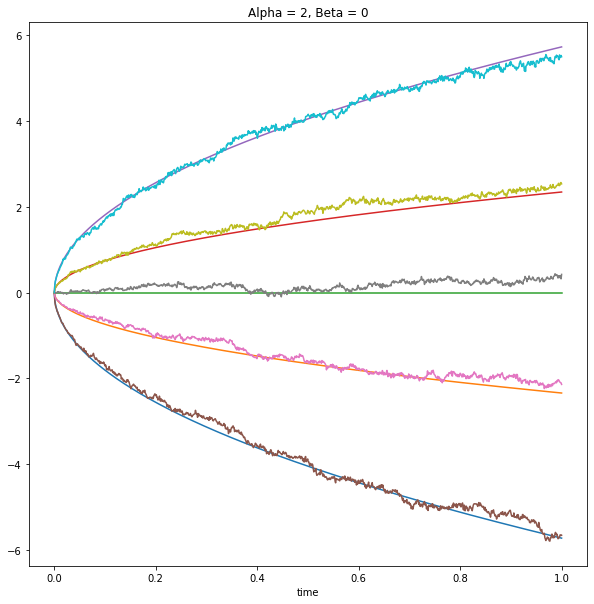

In [11]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic.T);
ax_q.plot(t, Quantile.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");


### Alpha-stable 1.5

In [12]:
alpha15 = 1.5
beta15 = 0

X_1_5_stable_motion = Levy_processes(T, M, N, alpha15, beta15)

In [13]:

@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_1_5_stable_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_1_5_stable_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha15, beta15, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha15, beta15)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha15))

    return Quantile_teoretic


In [14]:
Quantile15 = Brounian_empirical_quantile(ps, N, X_1_5_stable_motion)
Quantile_teoretic15 = Brounian_teoretical_quantile(ps, N, alpha15, beta15, T)


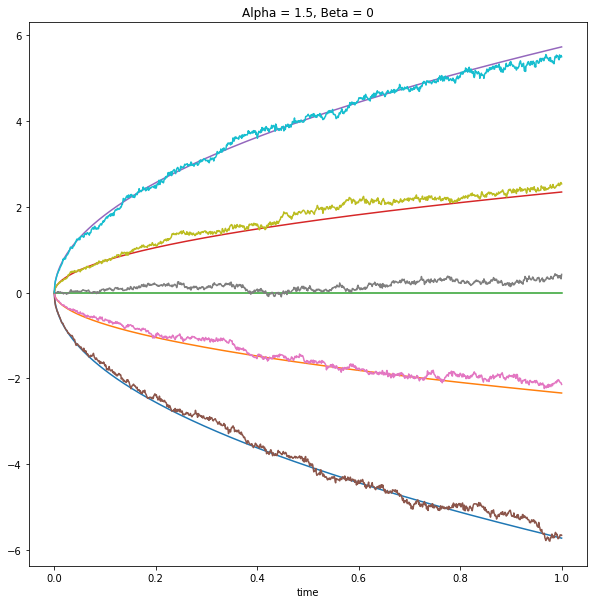

In [15]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic15.T);
ax_q.plot(t, Quantile15.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Fractional Brownian motion 0.3 & 0.7

In [16]:
alpha = 2
beta = 0
@cache("get_FBS03")
def get_FBS03():
    return integral_form_simulation(0.3, 2, 0, N_trajectories=M)[1]

@cache("get_FBS07")
def get_FBS07():
    return integral_form_simulation(0.7, 2, 0, N_trajectories=M)[1]

FBS_03 = get_FBS03()
FBS_07 = get_FBS07()


In [17]:
Quantile_FBS_03 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FBS_03[Np,:] = np.squeeze(equantile_proces(FBS_03.T, p))

Quantile_FBS_07 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FBS_07[Np,:] = np.squeeze(equantile_proces(FBS_07.T, p))


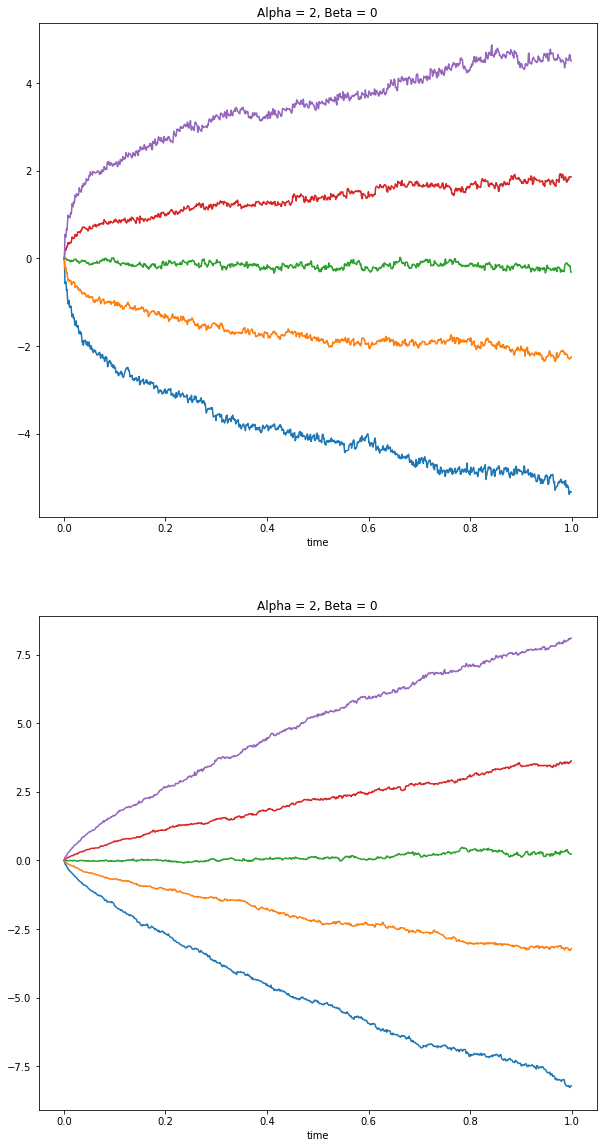

In [18]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FBS_03, Quantile_FBS_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");

### Fractional 1.5 Stable motion 0.3 & 0.7

In [19]:

@cache("get_FSM1_5_03")
def get_FSM1_5_03():
    return integral_form_simulation(0.3, 1.5, 0, N_trajectories=M)[1]

@cache("get_FSM1_5_07")
def get_FSM1_5_07():
    return integral_form_simulation(0.7, 1.5, 0, N_trajectories=M)[1]

FSM1_5_03 = get_FSM1_5_03()
FSM1_5_07 = get_FSM1_5_07()


In [20]:

Quantile_FSM1_5_03 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_03[Np,:] = np.squeeze(equantile_proces(FSM1_5_03.T, p))
    

Quantile_FSM1_5_07 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_07[Np,:] = np.squeeze(equantile_proces(FSM1_5_07.T, p))
    

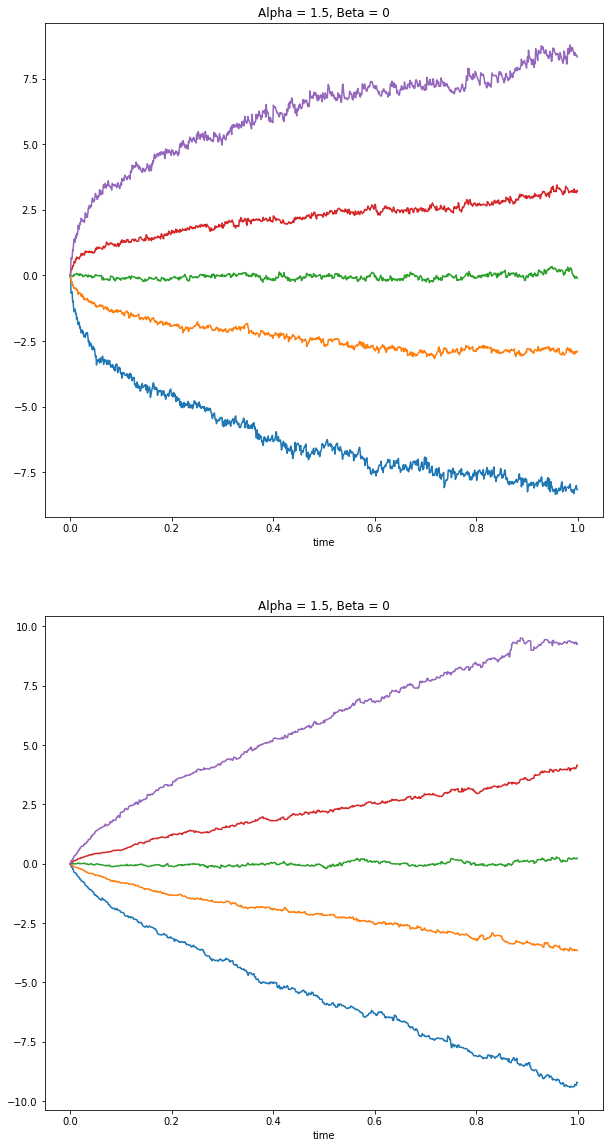

In [21]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FSM1_5_03, Quantile_FSM1_5_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Ornstein-Uhlenbeck process

In [22]:
@cache("get_OUP")
def get_OUP():
    return integral_form_ou_simulation(lam = 2, sigma = 2, alpha = 2, beta = 0, M1 = -100, M2 = 100, N_trajectories = M, I = 10000, dt = 0.01)[1]

OUP = get_OUP()

In [23]:

Quantile_OUP = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_OUP[Np,:] = np.squeeze(equantile_proces(OUP.T, p))
    

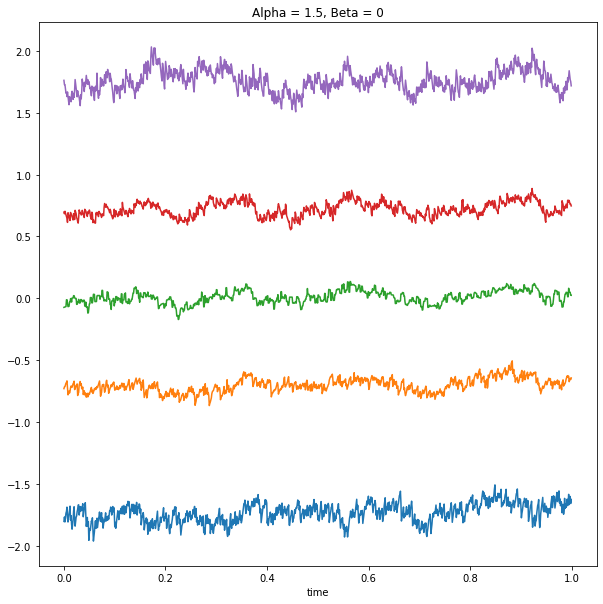

In [24]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q
ax_q.plot(t[:-1], Quantile_OUP.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

In [25]:
proceses = (
    ("Brownian", X_Brownian_motion),
    ("1.5 Alpha Stable", X_1_5_stable_motion),
    ("Fractional Brownian process H=0.3", FBS_03),
    ("Fractional Brownian process H=0.7", FBS_07),
    ("Fractional 1.5 Stable process H=0.3", FSM1_5_03),
    ("Fractional 1.5 Stable process H=0.7", FSM1_5_07),
    ("O-U process", OUP),
    )
gen_function_proceses = (
    ("Brownian", lambda T,N,M: Levy_processes(T, N, M, 1.5, 0)),
    ("1.5 Alpha Stable", lambda T,N,M: Levy_processes(T, N, M, 1.5, 0)),
    ("Fractional Brownian process H=0.3", lambda T,N,M: integral_form_simulation(0.3, 2, 0, N_trajectories=M, time_horizon=T, dt = T/(N - 1))[1]),
    ("Fractional Brownian process H=0.7", lambda T,N,M: integral_form_simulation(0.7, 2, 0, N_trajectories=M, time_horizon=T, dt = T/(N - 1))[1]),
    ("Fractional 1.5 Stable process H=0.3", lambda T,N,M: integral_form_simulation(0.3, 1.5, 0, N_trajectories=M, time_horizon=T, dt = T/(N - 1))[1]),
    ("Fractional 1.5 Stable process H=0.7", lambda T,N,M: integral_form_simulation(0.7, 1.5, 0, N_trajectories=M, time_horizon=T, dt = T/(N - 1))[1]),
    ("O-U process", lambda T,N,M: integral_form_ou_simulation(N_trajectories = M, time_horizon=T, dt = T/(N - 1))[1]),
    )

names_proceses = (
    "Brownian",
    "1.5 Alpha Stable",
    "Fractional Brownian process H=0.3",
    "Fractional Brownian process H=0.7",
    "Fractional 1.5 Stable process H=0.3",
    "Fractional 1.5 Stable process H=0.7",
    "O-U process",
    )

## self-similar

In [26]:

scaled_proceses = (
    ("Brownian", lambda c: c**(-2)),
    ("1.5 Alpha Stable", lambda c: c**(-1.5)),
    ("Fractional Brownian process H=0.3", lambda c: c),
    ("Fractional Brownian process H=0.7", lambda c: c),
    ("Fractional 1.5 Stable process H=0.3", lambda c: c),
    ("Fractional 1.5 Stable process H=0.7", lambda c: c),
    ("O-U process", lambda c: 1),
    )
c = 4


In [27]:
for i, (name, fun) in enumerate(gen_function_proceses):
    N_scaled = scaled_proceses[i][1](c) * T
    X1 = fun(T, 2, M)[-1,:]
    X2 = fun(T, 2, M)[-1,:]
    print()
    print(name)
    p_val = ks_2samp(X1, X2)
    print(p_val)



Brownian
KstestResult(statistic=0.5, pvalue=1.0)

1.5 Alpha Stable
KstestResult(statistic=0.5, pvalue=1.0)

Fractional Brownian process H=0.3
KstestResult(statistic=0.029, pvalue=0.7946637387576738)

Fractional Brownian process H=0.7
KstestResult(statistic=0.036, pvalue=0.5362766985932181)

Fractional 1.5 Stable process H=0.3
KstestResult(statistic=0.032, pvalue=0.6854967337920594)

Fractional 1.5 Stable process H=0.7
KstestResult(statistic=0.019, pvalue=0.9937026761524456)

O-U process
KstestResult(statistic=0.056, pvalue=0.08689937254547132)


## Characteristic function

In [28]:
N_char = 10 ** 2
t_char = np.linspace(-3,3, N_char)


In [29]:
@cache("characteristic_function")
def get_phi(proceses, t_char):
    phi = np.zeros((2 * len(proceses), len(t_char)))
    for i, (name, proces) in enumerate(proceses):
        res = characterist_r_i(t_char, proces[-1, :])
        phi[2 * i] = np.squeeze(res[0])
        phi[2 * i + 1] = np.squeeze(res[1])
    return phi

phi = get_phi(proceses, t_char)


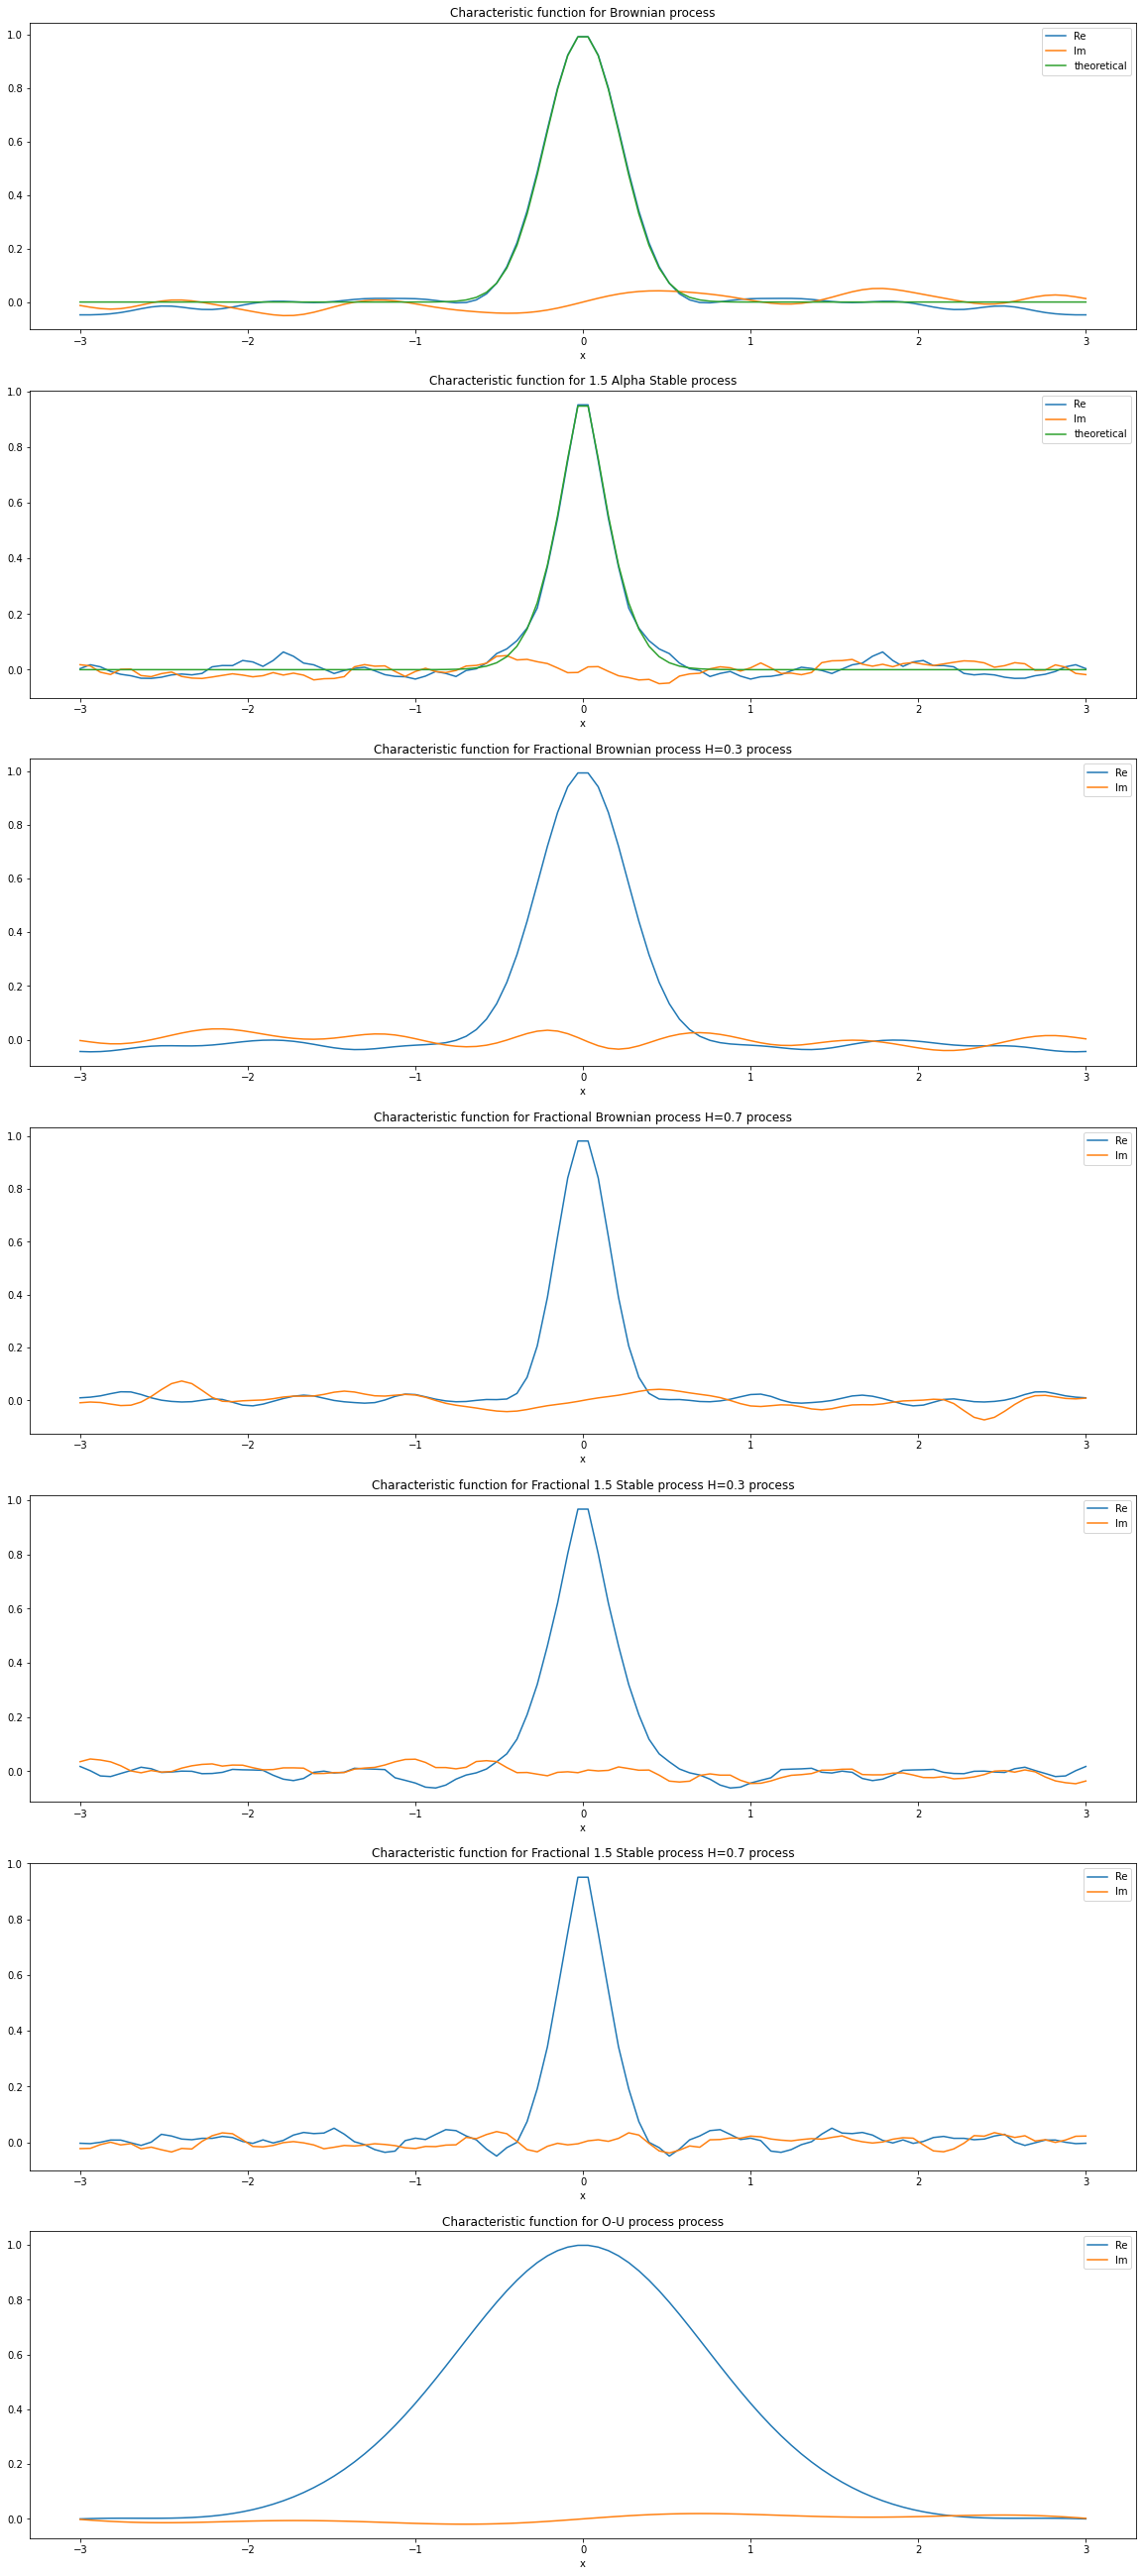

In [30]:
fig_q, axs_q = plt.subplots(nrows = 7, ncols = 1, figsize = (2 * Image_width,  7 * 2 / 3 * Image_width)) # Image_width as 1.5 Image_width
Theoretical = [np.exp(-np.power(abs(T ** (1/2) * t_char), 2)),
            np.exp(-np.power(abs(T ** (1/1.5) * t_char), 1.5)),
            ]

for i, name in enumerate(names_proceses):
    ax_q = axs_q[i]
    ax_q.plot(t_char, phi[2 * i,:]);
    ax_q.plot(t_char, phi[2 * i + 1,:]);
    if i < len(Theoretical):
        ax_q.plot(t_char, Theoretical[i])
    ax_q.set_xlabel("x")
    ax_q.legend(["Re", "Im", "theoretical"])
    ax_q.set_title(f"Characteristic function for {name} process");

## TAMSD EAMSD EATAMSD

In [31]:
@cache("TAMSDs")
def get_TAMSDs(proceses):
    TAMSD_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            TAMSD_matrix[i][tau] = TAMSD(proces[:,0], tau)
    return TAMSD_matrix

@cache("EAMSDs")
def get_EAMSDs(proceses):
    EAMSD_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            EAMSD_matrix[i][tau] = EAMSD(proces, tau)
    return EAMSD_matrix

@cache("EATAMSDs")
def get_EATAMSDs(proceses):
    EATAMSDs_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            EATAMSDs_matrix[i][tau] = EATAMSD(proces, tau)
    return EATAMSDs_matrix

TAMSDs = get_TAMSDs(proceses)
EAMSDs = get_EAMSDs(proceses)
EATAMSDs = get_EATAMSDs(proceses)


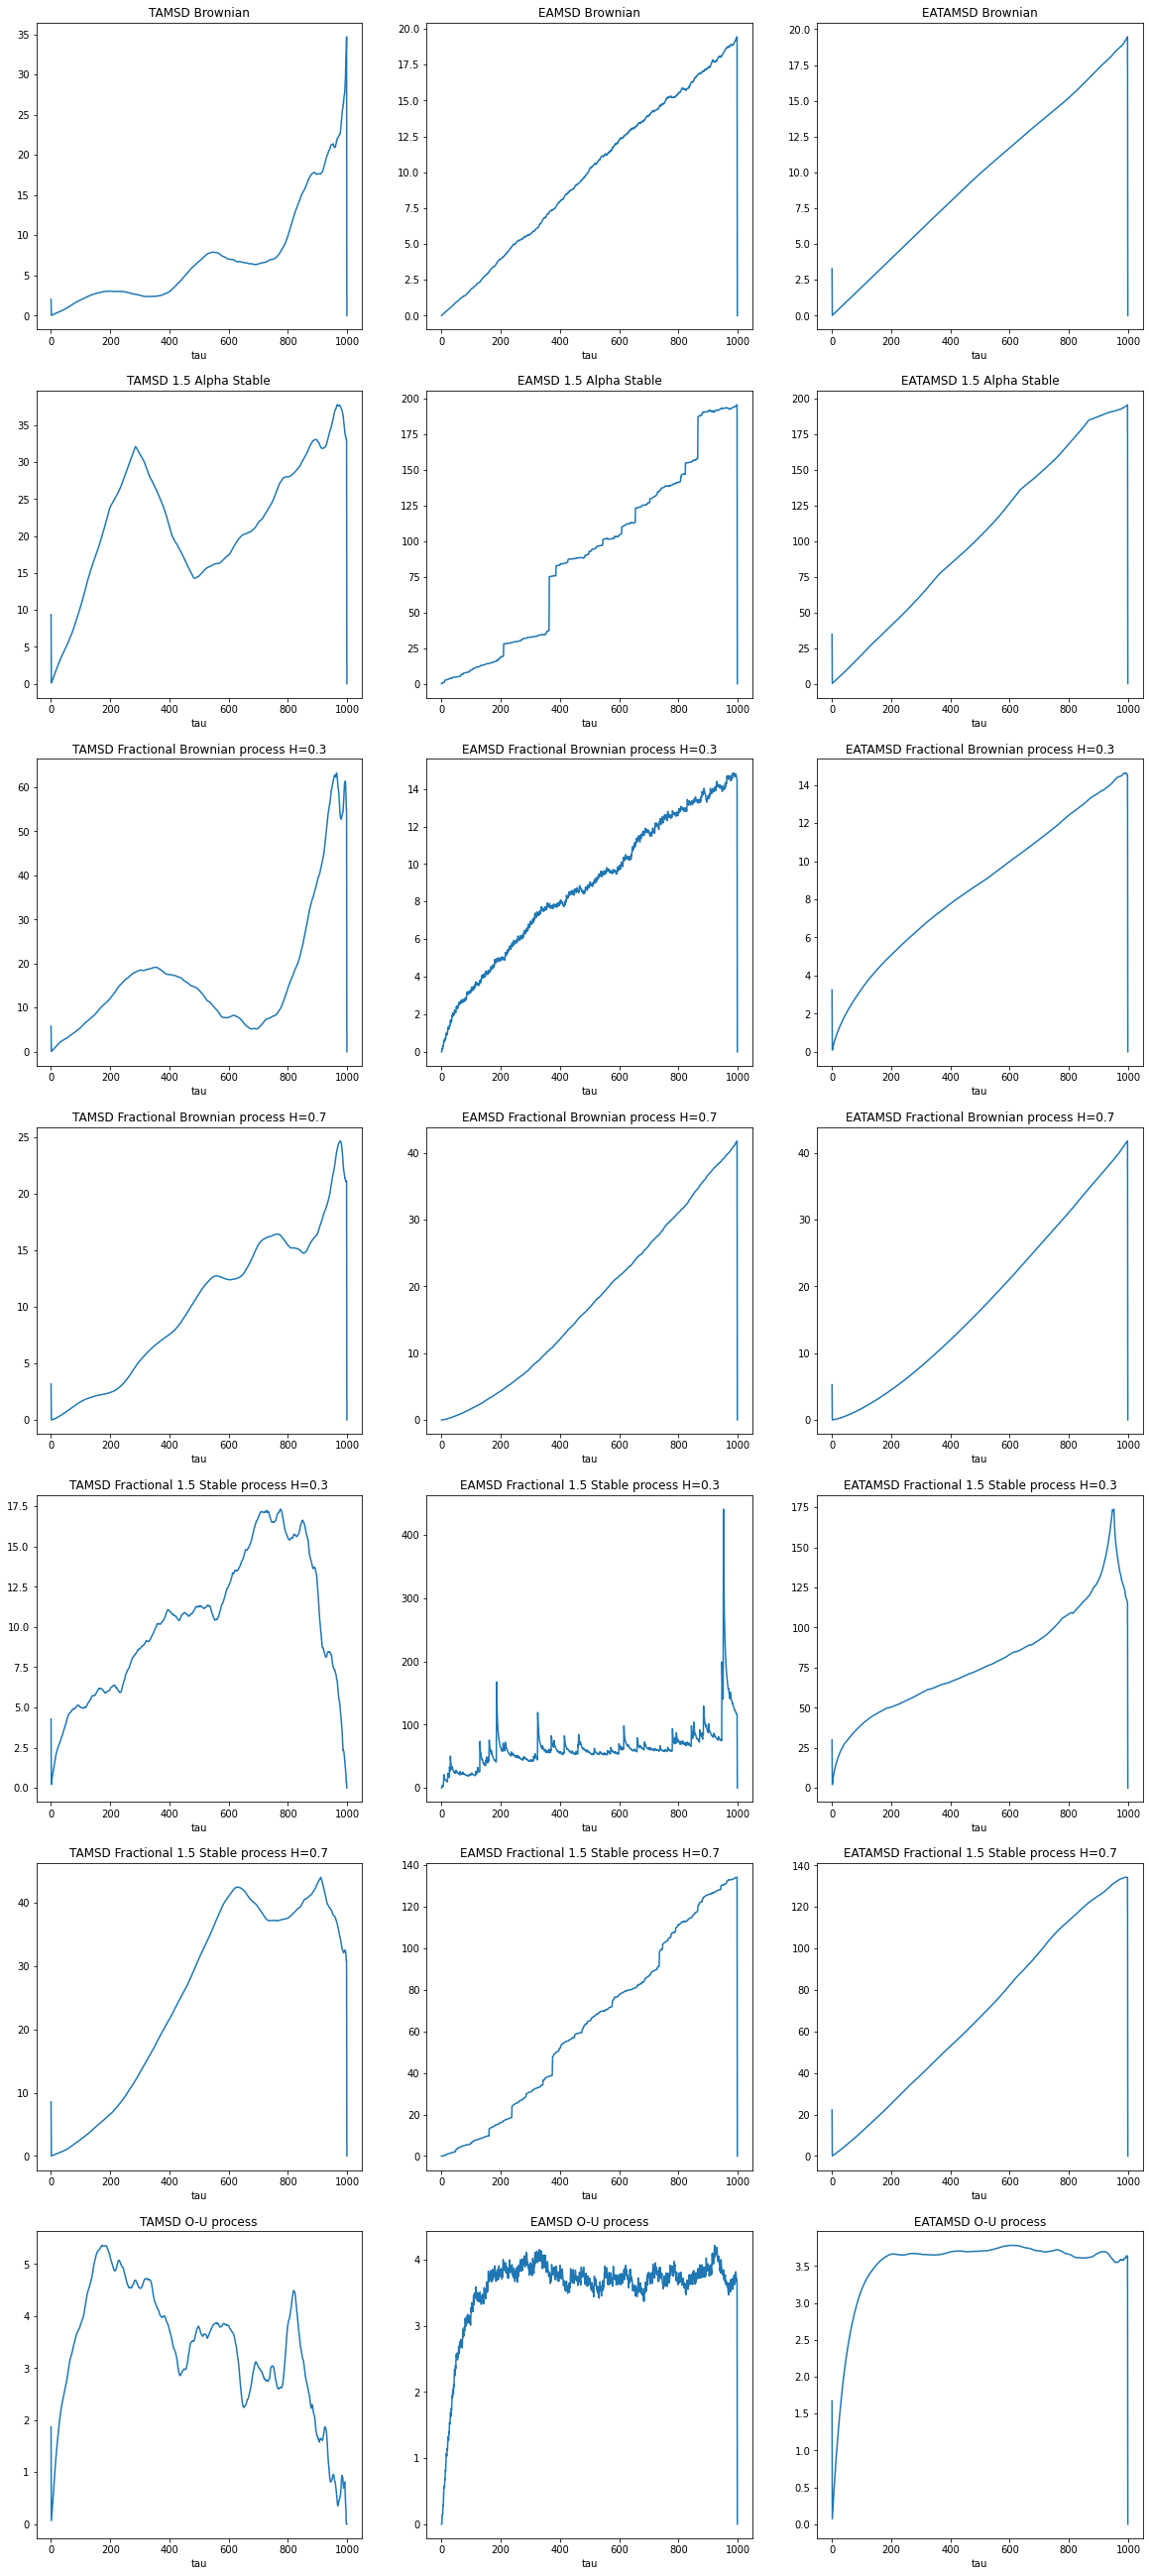

In [32]:
fig_q, axs_q = plt.subplots(nrows = 7, ncols = 3, figsize = (2 * Image_width, 7 * 2 / 3 * Image_width)) # Image_width as 1.5 Image_width


for i, name in enumerate(names_proceses):
    ax_q = axs_q[i, 0]
    ax_q.plot(TAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"TAMSD {name}");    
    ax_q = axs_q[i, 1]
    ax_q.plot(EAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"EAMSD {name}");
    ax_q = axs_q[i, 2]
    ax_q.plot(EATAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"EATAMSD {name}");



## Distribution

### Brownian motion

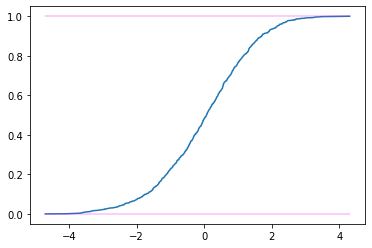

In [33]:
x = CDF2(X_Brownian_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));

plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);

### 1.5 stable

(-10.0, 10.0)

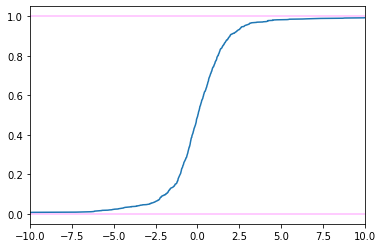

In [34]:
x = CDF2(X_1_5_stable_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));
plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);
# plt.plot(x, np.linspace(0,1, len(x)));
plt.xlim([-10, 10])
